# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [2]:
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import model_selection
from google.colab import files

u = files.upload()

def text_splitter(x):
    x = x.split(" ")
    return x[0], x[1:]

train = pd.DataFrame(columns=['text', 'target'])
test = pd.DataFrame(columns=['text', 'target'])

with open('stsa-train.txt') as f:
    for i in f.readlines():
        target, text = text_splitter(i)
        train.loc[len(train.index)] = [text, target]

with open('stsa-test.txt') as f:
    for i in f.readlines():
        target, text = text_splitter(i)
        test.loc[len(test.index)] = [text, target]

stop_word = stopwords.words('english')
p = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def text_manipulation(texts):
    without_punt = []
    without_stop_w = []
    for text in texts:
        text = text.strip()
        text = text.lower()
        if text not in string.punctuation:
            without_punt.append(text)
        if text not in stop_word:
            without_stop_w.append(text)
    without_num = []
    for word in without_stop_w:
        if word.isdigit():
            continue
        if word.isalnum():
            word = list(word)
            words = [i for i in word if i not in p]
            word = ''.join(words)
            without_num.append(word)
        else:
            without_num.append(word)
    without_len1_2 = [word for word in without_num if len(word) >= 3]
    return without_len1_2

train['text'] = train['text'].apply(text_manipulation)
test['text'] = test['text'].apply(text_manipulation)

c = Counter()
for text in train['text']:
    for word in text:
        c[word] += 1

print(c)
print(len(c))

top_400_voc = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
top_400_voc = {k: c[k] for k in list(top_400_voc.keys())[:400]}
features = list(top_400_voc.keys())

df_train = pd.DataFrame(columns=features)
df_test = pd.DataFrame(columns=features)

def term_document_matrix(word_list):
    term_matrix = dict()
    for word in features:
        if word in word_list:
            occ = word_list.count(word)
            term_matrix[word] = occ
        else:
            term_matrix[word] = 0
    return term_matrix

for col, row in train.iterrows():
    w_list = term_document_matrix(row['text'])
    df_train.loc[len(df_train.index)] = w_list

df_train['Target'] = train['target']
df_train

for col, row in test.iterrows():
    w_list = term_document_matrix(row['text'])
    df_test.loc[len(df_test.index)] = w_list

df_test['Target'] = test['target']
df_test


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving stsa-test.txt to stsa-test.txt
Saving stsa-train.txt to stsa-train.txt
Counter({'film': 956, 'movie': 808, "n't": 535, '...': 525, 'one': 446, 'like': 413, 'story': 289, '-rrb-': 287, '-lrb-': 286, 'even': 221, 'good': 214, 'comedy': 212, 'much': 209, 'characters': 199, 'time': 188, 'funny': 181, 'little': 174, 'way': 167, 'never': 158, 'director': 157, 'make': 157, 'work': 152, 'would': 149, 'bad': 149, 'makes': 149, 'love': 145, 'enough': 143, 'may': 138, 'life': 136, 'best': 131, 'movies': 131, 'could': 127, 'new': 126, 'drama': 123, 'something': 120, 'well': 117, 'made': 117, 'really': 117, 'performances': 111, 'many': 109, 'plot': 109, 'nothing': 109, 'films': 108, 'better': 108, 'action': 108, 'without': 107, 'every': 106, 'people': 103, 'two': 100, 'see': 99, 'look': 99, 'ever': 98, "'re": 97, 'cast': 96, 'still': 94, 'humor': 94, 'also': 94, 'great': 94, 'sense': 91, 'script': 91, 'fun': 89, 'long': 89, 'audience': 88, 'often': 88, 'character': 87, 'feel': 86, 'might': 8

<ipython-input-2-1de4079cf27a>:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['Target'] = train['target']
<ipython-input-2-1de4079cf27a>:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['Target'] = test['target']


,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,imagination,told,role,bland,contrived,animation,honest,jokes,mystery,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Multinomial NB

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
mul_nav_model = MultinomialNB()
#cross validation
cs  = model_selection.cross_val_score(mul_nav_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
mul_nav_model.fit(x,y)
pred = mul_nav_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

[0.66606498 0.70758123 0.70216606 0.65523466 0.72021661 0.68772563
 0.67631103 0.67992767 0.72694394 0.70162749]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       912
           1       0.68      0.75      0.71       909

    accuracy                           0.70      1821
   macro avg       0.70      0.70      0.70      1821
weighted avg       0.70      0.70      0.70      1821



In [4]:
# SVM

from sklearn import svm
svm_model = svm.SVC()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(svm_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
svm_model.fit(x,y)
pred = svm_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

[0.68953069 0.71119134 0.68592058 0.65884477 0.6967509  0.69855596
 0.65822785 0.67631103 0.66184448 0.65822785]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       912
           1       0.71      0.70      0.70       909

    accuracy                           0.70      1821
   macro avg       0.70      0.70      0.70      1821
weighted avg       0.70      0.70      0.70      1821



In [5]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(knn_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
knn_model.fit(x,y)
pred = knn_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

[0.5631769  0.58483755 0.61371841 0.59205776 0.55234657 0.56137184
 0.58951175 0.55153707 0.60578662 0.57142857]
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       912
           1       0.60      0.51      0.55       909

    accuracy                           0.59      1821
   macro avg       0.59      0.59      0.59      1821
weighted avg       0.59      0.59      0.59      1821



In [6]:
#DecisionTree
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(tree_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
tree_model.fit(x,y)
pred = tree_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))


[0.61371841 0.60649819 0.62454874 0.62635379 0.59566787 0.61371841
 0.65280289 0.63110307 0.61663653 0.62206148]
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       912
           1       0.65      0.61      0.63       909

    accuracy                           0.64      1821
   macro avg       0.64      0.64      0.64      1821
weighted avg       0.64      0.64      0.64      1821



In [7]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target']
cs  = model_selection.cross_val_score(forest_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target']
forest_model.fit(x,y)
pred = forest_model.predict(df_test[features])
print(classification_report(df_test['Target'], pred))

[0.67870036 0.68050542 0.65703971 0.67148014 0.65523466 0.63537906
 0.67631103 0.67450271 0.67992767 0.65099458]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       912
           1       0.70      0.65      0.67       909

    accuracy                           0.68      1821
   macro avg       0.68      0.68      0.68      1821
weighted avg       0.68      0.68      0.68      1821



In [8]:
#XGBoost
from xgboost import XGBClassifier
bst_model = XGBClassifier()
def string_ch(x):
  return int(x)
tr, val  = train_test_split(df_train, test_size=0.2)
x = tr[features]
y = tr['Target'].apply(string_ch)
cs  = model_selection.cross_val_score(bst_model, x, y, cv=10)
print(cs)
x = df_train[features]
y = df_train['Target'].apply(string_ch)
bst_model.fit(x,y)
pred = bst_model.predict(df_test[features])
print(classification_report(df_test['Target'].apply(string_ch), pred))

[0.70397112 0.7166065  0.68411552 0.69494585 0.69314079 0.68772563
 0.67088608 0.67631103 0.69439421 0.69439421]
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       912
           1       0.65      0.76      0.71       909

    accuracy                           0.68      1821
   macro avg       0.69      0.68      0.68      1821
weighted avg       0.69      0.68      0.68      1821



In [9]:
#Word2Vec
from gensim.models import Word2Vec
t_df = pd.concat([train, test])
word2vec = Word2Vec( vector_size = 100, negative=5, hs=1, min_count=2, sample = 0)
word2vec.build_vocab([i for i in t_df['text']])
words = set(word2vec.wv.index_to_key )
import numpy as np
k = list()
for ls in t_df['text']:
  p = list()
  for i in ls:
    if i in words:
      p.append(word2vec.wv[i])
  k.append(np.array(p))
final = list()
for i in k:
  final.append(np.array(i))
final_1 = list()
for i in final:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)
p = pd.DataFrame(final_1)
p
t_df = t_df.reset_index()
p['target'] = t_df['target']
mul_nav_model = MultinomialNB()
f = list(p.columns)
f.remove('target')
f
tr, tes  = train_test_split(p, test_size=0.2)
x = p[f]
y = p['target']
x = df_train[features]
y = df_train['Target']
mul_nav_model.fit(x,y)
pred = mul_nav_model.predict(x)
print(classification_report(df_train['Target'], pred))




              precision    recall  f1-score   support

           0       0.73      0.68      0.70      3310
           1       0.72      0.77      0.74      3610

    accuracy                           0.73      6920
   macro avg       0.73      0.72      0.72      6920
weighted avg       0.73      0.73      0.72      6920



In [10]:
#BERT
!pip install simpletransformers
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from collections import Counter
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score
cuda_available = torch.cuda.is_available()
train_args ={"reprocess_input_data": True,
             "fp16":False,
             "use_early_stopping" : 0,
             "num_train_epochs": 4}

model = ClassificationModel(
    "bert", 'bert-base-uncased',
    num_labels=2,
    args=train_args,
     use_cuda=cuda_available
)
train['target'] = train['target'].apply(string_ch)
model.train_model(train)
test
result, model_outputs, wrong_predictions = model.eval_model(test, acc=accuracy_score)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/865 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/865 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/865 [00:00<?, ?it/s]

Running Epoch 4 of 4:   0%|          | 0/865 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/3 [00:00<?, ?it/s]

ValueError: too many dimensions 'str'

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [11]:
#For this task i used the above dataset by dropping the target label
test

,text,target
0,"[movement, yuks, much, anything]",0
1,"[gob, drivel, sickly, sweet, even, eager, cons...",0
2,"[gangs, new, york, unapologetic, mess, whose, ...",0
3,"[never, really, feel, involved, story, ideas, ...",0
4,"[one, polanski, best, films]",1
...,...,...
1816,"[often-deadly, boring, strange, reading, class...",0
1817,"[problem, concept, films, concept, poor, one, ...",0
1818,"[safe, conduct, however, ambitious, well-inten...",0
1819,"[film, made, little, wit, interest, profession...",0


In [12]:
t_df = pd.concat([train, test]).reset_index()
t_df  = t_df.drop(['index', 'target'], axis = 1)
t_df

,text
0,"[stirring, funny, finally, transporting, re-im..."
1,"[apparently, reassembled, cutting-room, floor,..."
2,"[presume, audience, n't, sit, still, sociology..."
3,"[visually, stunning, rumination, love, memory,..."
4,"[jonathan, parker, bartleby, be-all-end-all, m..."
...,...
8736,"[often-deadly, boring, strange, reading, class..."
8737,"[problem, concept, films, concept, poor, one, ..."
8738,"[safe, conduct, however, ambitious, well-inten..."
8739,"[film, made, little, wit, interest, profession..."


In [13]:
stop_word = stopwords.words('english')
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(texts):
  without_punt = []
  without_stop_w = []
  for text in texts:
    text = text.strip()
    text = text.lower()
    if text not in string.punctuation:
      without_punt.append(text)
    if text not in stop_word:
      without_stop_w.append(text)
  without_num = []
  for word in without_stop_w:
      if word.isdigit():
          continue
      if word.isalnum():
          word = list(word)
          words = [i for i in word if i not in p]
          word = ''.join(words)
          without_num.append(word)
      else:
          without_num.append(word)
  without_len1_2 = [word for word in without_num if len(word) >=3]
  return without_len1_2


In [14]:
t_df['text'] = t_df['text'].apply(text_manipulation)
c = Counter()
for text in t_df['text']:
  for word in text:
    c[word] += 1
print(c)
top_400_voc = {k: v for k, v in sorted(c.items(), key=lambda item: item[1], reverse=True)}
top_400_voc = {k:c[k] for k in list(top_400_voc.keys())[:400]}
features = list(top_400_voc.keys())
features
bog_df = pd.DataFrame(columns = features)
def term_document_matrix(word_list):
    term_matrix = dict()
    for word in features:
        if(word in word_list):
            occ = word_list.count(word)
            term_matrix[word] = occ
        else:
            term_matrix[word] = 0
    return term_matrix
for col, row in t_df.iterrows():
  w_list = term_document_matrix(row['text'])
  bog_df.loc[len(bog_df.index)] = w_list
bog_df

Counter({'film': 1187, 'movie': 1014, "n't": 669, '...': 649, 'one': 545, 'like': 535, 'story': 371, '-rrb-': 360, '-lrb-': 357, 'even': 287, 'much': 278, 'comedy': 274, 'good': 268, 'characters': 244, 'time': 241, 'way': 225, 'little': 224, 'funny': 223, 'make': 202, 'director': 199, 'never': 196, 'enough': 193, 'bad': 192, 'makes': 188, 'would': 186, 'work': 183, 'life': 179, 'may': 176, 'best': 175, 'love': 172, 'could': 162, 'movies': 160, 'well': 156, 'new': 155, 'really': 149, 'performances': 147, 'something': 146, 'films': 144, 'drama': 141, 'action': 138, 'made': 137, 'many': 136, 'plot': 136, 'still': 134, 'see': 134, 'people': 134, 'nothing': 133, 'two': 131, 'better': 130, 'every': 130, "'re": 127, 'great': 123, 'without': 122, 'look': 122, 'ever': 121, 'long': 120, 'cast': 119, 'get': 117, 'fun': 116, 'sense': 113, 'humor': 113, 'audience': 112, 'might': 112, 'script': 110, 'also': 110, 'though': 108, 'world': 107, 'first': 107, 'performance': 107, 'often': 106, 'character'

,film,movie,n't,...,one,like,story,-rrb-,-lrb-,even,...,line,sequel,written,sex,writing,live,talent,psychological,animation,leaves
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8737,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8739,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

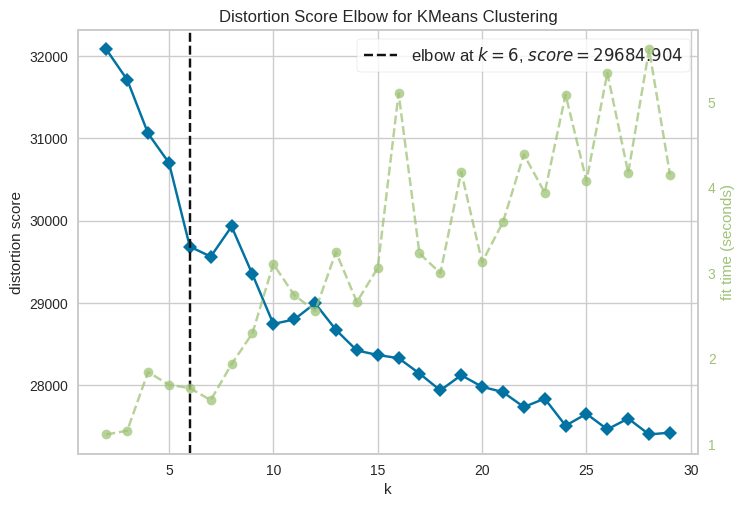

In [15]:
# K-means
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Determine optimal number of clusters using elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(bog_df)
visualizer.show()

# Fit K-means with optimal number of clusters
k = KMeans(init='k-means++', n_clusters=11, n_init=100, random_state=0).fit(bog_df)
labels = k.predict(bog_df)


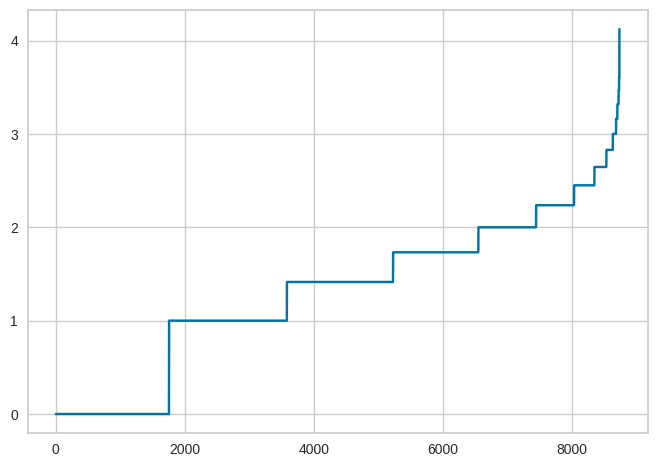

In [16]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Determine optimal value for epsilon using nearest neighbors distances plot
nn = NearestNeighbors(n_neighbors=20).fit(bog_df)
distances, indices = nn.kneighbors(bog_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
# Plot distances to determine epsilon value
plt.plot(distances)

# Fit DBSCAN with optimal epsilon value
db_model = DBSCAN(eps=1)
db_model.fit(bog_df)
labels = db_model.labels_


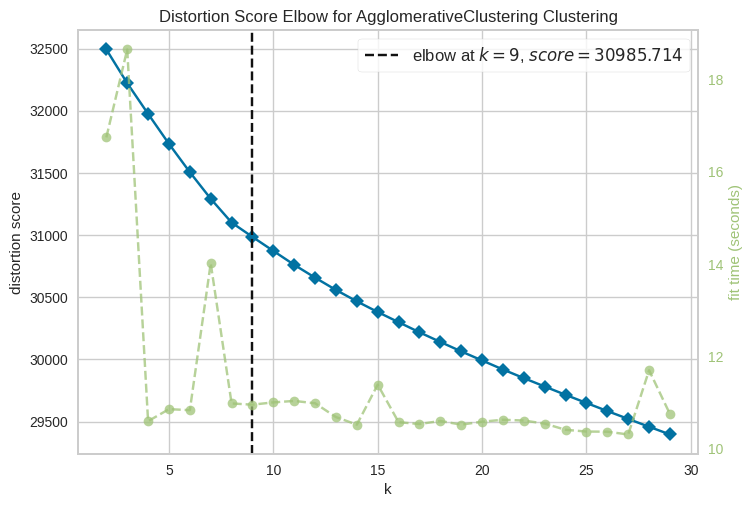

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [17]:
#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# Determine optimal number of clusters using elbow method
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(bog_df)
visualizer.show()

# Fit hierarchical clustering with optimal number of clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(bog_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

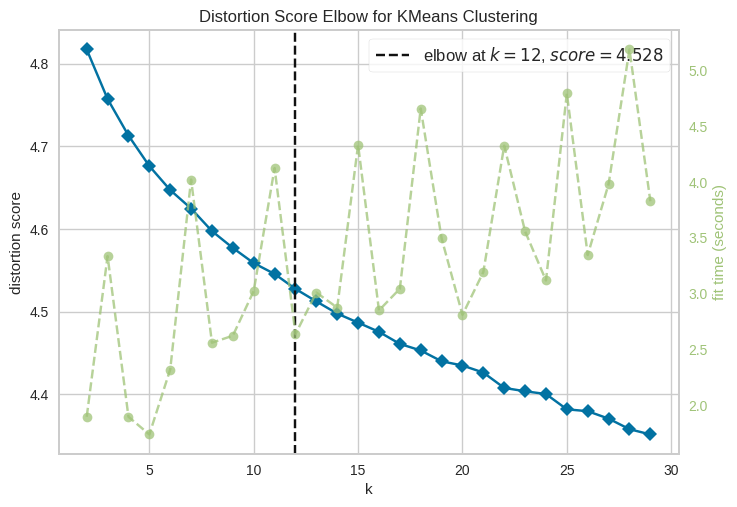

                                                   text  Cluster
21                       [slick, engrossing, melodrama]        0
29    [gooding, offers, desperately, ingratiating, p...        0
33                                 [russian, word, wow]        0
37    [could, feel, screenwriter, every, moment, tap...        0
39                  [live, mood, rather, savour, story]        0
...                                                 ...      ...
8639  [director, brian, levant, never, strays, far, ...        0
8644  [one, hour, photo, intriguing, snapshot, one, ...        0
8652  [rather, 'll, wrestle, disbelief, ground, appl...        0
8654  [involving, times, lapses, quite, casually, ab...        0
8659  [film, real, appeal, n't, clooney, fans, adven...        0

[605 rows x 2 columns]
**********
                                                   text  Cluster
0     [stirring, funny, finally, transporting, re-im...        1
38    [overall, cletis, tout, winning, comedy, excit...

In [26]:
# word2vec
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np

# Train Word2Vec model
word2vec = Word2Vec(vector_size=100, negative=5, hs=1, min_count=2, sample=0)
word2vec.build_vocab([i for i in t_df['text']])

# Generate Word2Vec embeddings
embeddings = []
for ls in t_df['text']:
    p = []
    for i in ls:
        if i in word2vec.wv:
            p.append(word2vec.wv[i])
    embeddings.append(np.array(p))

# Compute average embeddings
final = []
for i in embeddings:
    p = []
    for j in range(100):
        sum = 0
        for k in i:
            sum += k[j]
        try:
            avg = sum / len(i)
        except:
            continue
        p.append(avg)
    final.append(p)

# Convert to DataFrame
p_df = pd.DataFrame(final).fillna(0)

# Determine optimal number of clusters using the elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(p_df)
visualizer.show()

# Perform K-means clustering
kmeans = KMeans(init='k-means++', n_clusters=11, n_init=100, random_state=0).fit(p_df)
labels = kmeans.predict(p_df)

# Assign cluster labels to the dataframe
t_df['Cluster'] = labels

# Display clusters
for i in range(9):
    print(t_df[t_df['Cluster'] == i])
    print('*' * 10)



In [25]:
# BERT

# Install sentence-transformers library
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

# Initialize BERT model
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Generate BERT embeddings for text data
embeddings = []
for text in t_df['text']:
    embeddings.append(embedder.encode(text))

# Convert embeddings to DataFrame
k_df = pd.DataFrame(embeddings)

# Determine optimal number of clusters using the elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(k_df)
visualizer.show()

# Perform K-means clustering
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=100, random_state=0).fit(k_df)
labels = kmeans.predict(k_df)

# Assign cluster labels to the dataframe
t_df['Cluster'] = labels

# Display clusters
for i in range(10):
    print(t_df[t_df['Cluster'] == i])
    print('*' * 10)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8741,) + inhomogeneous part.

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

In k mean From the elbow curve it suggest the k-values as 11 and From the first task in k mean we observe that we have only 2 target values but here the clusters values shows 11 values which may act as like ratings. Dbscan It shows that the eps value is 1and It shows that they are 2 labels which are correct as the target in the task-1. Bert it suggest that k=10.





# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
From this exercise we covered all the topics related to the different machine learning algorithms for text clustering.





'''